In [60]:
# import basic libraries 
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import re
import string

# read csv
df = pd.read_csv('../data/data_clean.csv')
df_copy = df.copy()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lilmac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Sentiment scores in new column

In [61]:
text_list = df_copy['text'].tolist()

In [83]:
text_list

['Hang told me to add it in education',
 'What improved my score was adding metrics of achievements. And using synonyms with stronger verbs.',
 "I feel like a slave to this dumb Resume Worded algorithm. It simply doesn't like the format I chose and i had to stick to a very lean one column CV. Imagine in the future, when much more serious decisions will be made by algorithms with serious flaws like this.",
 'Francisco, we have to remove the fancy/beautiful format before upload there.',
 'Ah, ok!',
 'I just copied each session. without any table, just text. Like the examples (models) in the website',
 'Yeah, I did this. It has improved, but not quiet there in the 70% mark',
 'Did you put career mid level?',
 'take a look in each feature you need most to improve and expand to check what you can make to improve',
 'I put first as junior, later as mid. I had better score using  mid.',
 'Which one do we have to submit?',
 'I choose when evaluating, but inside my CV I just put data analyst/re

In [85]:
#load the descriptions into textblob
post_blob = [TextBlob(desc) for desc in df['text']]
#add the sentiment metrics to the dataframe
df['tb_Pol'] = [b.sentiment.polarity for b in post_blob]
df['tb_Subj'] = [b.sentiment.subjectivity for b in post_blob]
#show dataframe
df.head(3)

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>

In [86]:
# load VADER
analyzer = SentimentIntensityAnalyzer()
# add VADER metrics to dataframe
df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in text_list]
df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in text_list]
df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in text_list]
df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in text_list]
df.head(3)

TypeError: 'float' object is not iterable

In [51]:
df.head()

,channel_name,user,real_name,text,text_length,reply_count,reply_users_count,replies_true,day_name,day_type,time,dayparts,day_number,month,reactions_count,link_of_file,files_true,link_of_attachments,attachments_true,reaction_true
0,general,U01S79YDELR,Karina Condeixa,Hang told me to add it in education,35,0,0,False,Sunday,Weekend,08:00,Morning,9,May,0,nofile,False,nolink,False,False
1,general,U01S79YDELR,Karina Condeixa,What improved my score was adding metrics of a...,98,0,0,False,Sunday,Weekend,08:01,Morning,9,May,0,nofile,False,nolink,False,False
2,general,U01RRV4JX6Z,Francisco Ebeling,I feel like a slave to this dumb Resume Worded...,261,31,2,True,Sunday,Weekend,15:27,Afternoon,9,May,0,nofile,False,nolink,False,False
3,general,U01S79YDELR,Karina Condeixa,"Francisco, we have to remove the fancy/beautif...",76,0,0,False,Sunday,Weekend,15:30,Afternoon,9,May,0,nofile,False,nolink,False,False
4,general,U01RRV4JX6Z,Francisco Ebeling,"Ah, ok!",7,0,0,False,Sunday,Weekend,15:32,Afternoon,9,May,0,nofile,False,nolink,False,False


### Wordcloud

In [52]:
# change the text type to string
df['text'] = df['text'].astype(str)

# before lowercasing 
df['text'][2]

# lowercase all reviews
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text'][2] ## to see the difference


"i feel like a slave to this dumb resume worded algorithm. it simply doesn't like the format i chose and i had to stick to a very lean one column cv. imagine in the future, when much more serious decisions will be made by algorithms with serious flaws like this."

In [53]:
# remove punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
df['text'] = df['text'].apply(remove_punctuations)
df['text'][2]

'i feel like a slave to this dumb resume worded algorithm it simply doesnt like the format i chose and i had to stick to a very lean one column cv imagine in the future when much more serious decisions will be made by algorithms with serious flaws like this'

In [54]:
# remove stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['text'][2]

'feel like slave dumb resume worded algorithm simply doesnt like format chose stick lean one column cv imagine future much serious decisions made algorithms serious flaws like'

In [89]:
# stemming
stemmer = PorterStemmer()
#df['text'] = df['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
#df['text'][2]

df['text']=df['text'].apply(lambda x: " ".join((stemmer.stem(i) for i in x.split())))



AttributeError: 'float' object has no attribute 'split'

In [92]:
# most common words
from collections import Counter
import itertools


# List of all words across tweets
all_words = list(itertools.chain(*text_list))

# Create counter
counts = collections.Counter(all_words)

counts.most_common(15)

TypeError: 'float' object is not iterable

In [66]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

In [68]:
df['text']

0                     Hang told me to add it in education
1       What improved my score was adding metrics of a...
2       I feel like a slave to this dumb Resume Worded...
3       Francisco, we have to remove the fancy/beautif...
4                                                 Ah, ok!
                              ...                        
4935                                Just saw this. Thanks
4936    I'll have a think. Need to develop a strategy ...
4937            heeeellppp…anyone? <@U01RSRE0N3D>? :eyes:
4938        I will have a look after the presentation :v:
4939    I quite like the Kaggle explanations. Been rea...
Name: text, Length: 4940, dtype: object

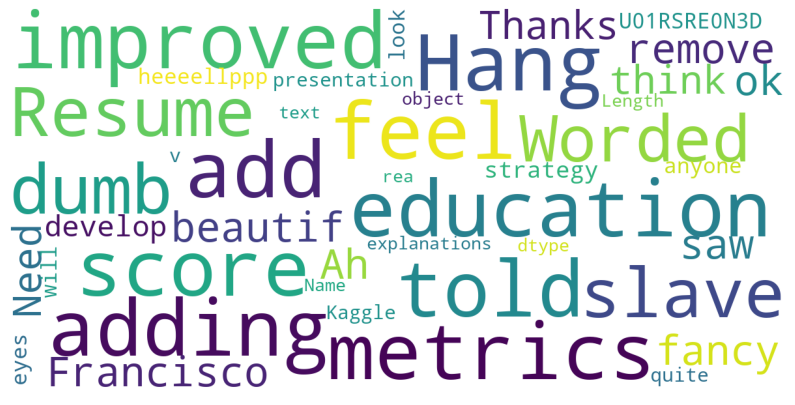

In [67]:
def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(df['text'])

In [82]:
tokens = nltk.word_tokenize(df['text'])
text = nltk.Text(tokens)

tokens_l = [w.lower() for w in tokens]

TypeError: expected string or bytes-like object